# Video Game Sales

## Goal

You work for a data science consulting company. A major video game production company, has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:

1. What are some major differences between the North American, European, and Japanese video game markets?

2. What video game genres are trending in each market? 

3. What features about a video game are most indicative of its success?


## The Data
This dataset contains a list of video games with sales greater than 100,000 copies.
* `Rank` - Ranking of overall sales
* `Name` - The games name
* `Platform` - Platform of the games release (i.e. PC,PS4, etc.)
* `Year` - Year of the game's release
* `Genre` - Genre of the game
* `Publisher` - Publisher of the game
* `NA_Sales` - Sales in North America (in millions)
* `EU_Sales` - Sales in Europe (in millions)
* `JP_Sales` - Sales in Japan (in millions)
* `Other_Sales` - Sales in the rest of the world (in millions)
* `Global_Sales` - Total worldwide sales.

In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
#import plotly.plotly as py
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
dat = pd.read_csv('vgsales.csv')
dat.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
dat.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
dat.describe(include='O')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [6]:
dat['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [7]:
dat['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

## Handling of Missing Data: 
* `Year` and `Publisher` have missing values.  
* Below are a couple of visualizations of the data that is missing from both variables. I wanted to check for any obvious systematic patterns readily visible within the data with missing values (e.g., maybe I might see that all games with missing data are all `Misc` `Genre`). From the plots below, it seems that there are patterns in the data that are missing, but it's still such a small proportion of the full dataset. So I might just ignore it for now.  
* Since it's so few (< .02% for both; see below), I will just drop the rows with missing values.  

In [42]:
print('% of Publisher data that is Missing: ') 
print((1 - 16540/16598))

print('% of Year data that is missing: ')
print((1 - 16327/16598))

% of Publisher data that is Missing: 
0.003494396915290965
% of Year data that is missing: 
0.016327268345583845


In [ ]:
dat.loc[dat['Name']==]

In [30]:
dat.loc[dat['Publisher'].isna()==True]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


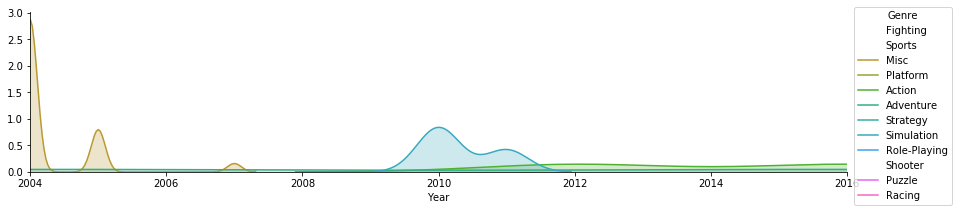

In [31]:
plot_kde_distribution(dat.loc[dat['Publisher'].isna() == True], var='Year', target='Genre')

In [33]:
dat.loc[dat['Year'].isna() == True]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


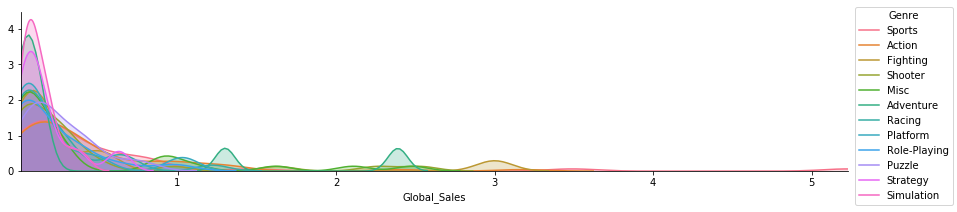

In [34]:
plot_kde_distribution(dat.loc[dat['Year'].isna() == True], var='Global_Sales', target='Genre')

In [35]:
### Drop all missing values: 

dat = dat.dropna()

## Data Exploration:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0bdffbe0>,
      dtype=object)

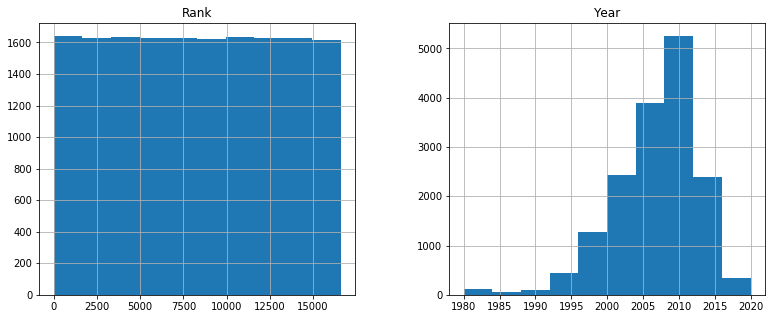

In [36]:
dat[['Rank', 'Year']].hist(figsize=(13,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0b9ac0f0>,
      dtype=object)

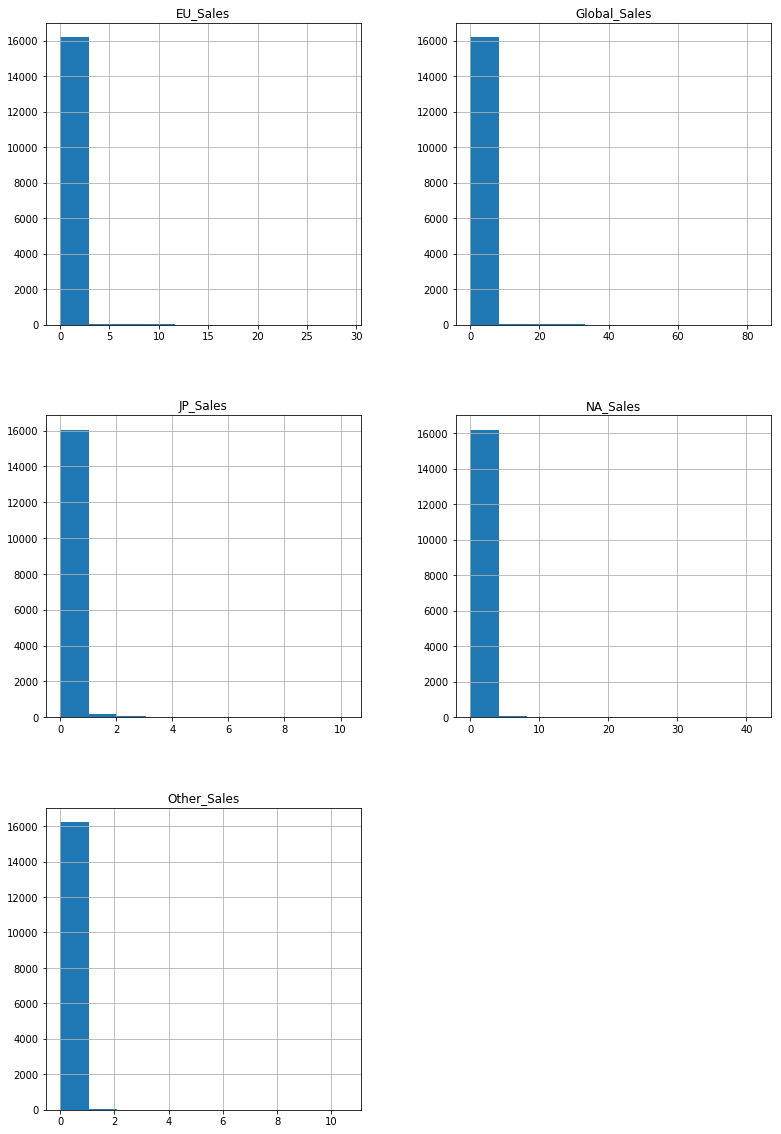

In [37]:
dat[['NA_Sales', 'EU_Sales', 'JP_Sales', 
     'Other_Sales', 'Global_Sales']].hist(figsize=(13,20))

In [44]:
def plot_kde_distribution( df , var , target ,
                          **kwargs ):
    '''
    This is a very general plotting function that makes kde distribution
        plots for each level of target.
    var = x-axis distribution variable
    target = categorical levels to plot seperate (overlayed) distributions
        for 
    '''
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , 
                          hue=target , 
                          aspect=4 , # aspect ratio of plot
                          row = row , 
                          col = col )
    facet.map( sns.kdeplot , var , shade= True ) 
        # kdeplot = kernel density estimate
    facet.set(xlim = (df[var].min(), df[var].max()))
    facet.add_legend()
    
def plot_histogram( df , x_var , class_var ):
    '''
    Plots histogram of x_var at each level of class_var.
    '''
    for i in df[class_var].unique(): 
        sns.distplot(df.loc[df[class_var] == i][x_var], kde=False)
    plt.show()

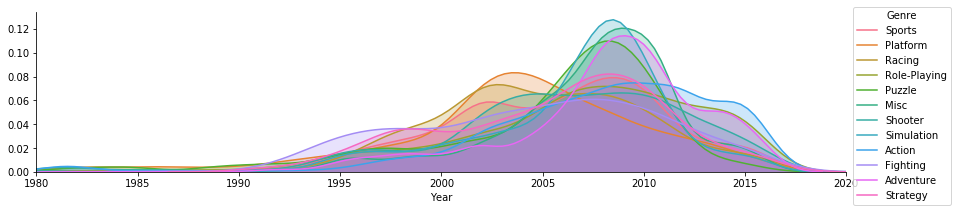

In [38]:
# Temporal trends by Genre:
plot_kde_distribution(dat, var='Year', target='Genre')

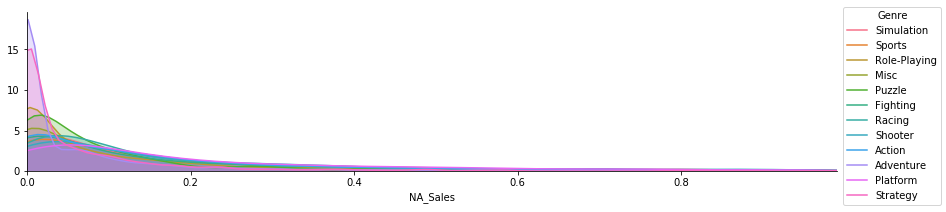

In [39]:
plot_kde_distribution(dat.loc[dat['NA_Sales'] < 1], var='NA_Sales', target='Genre')

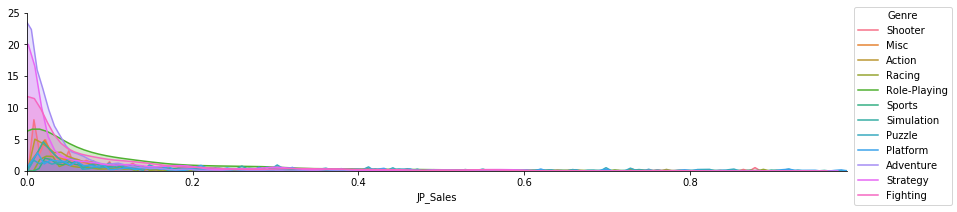

In [40]:
plot_kde_distribution(dat.loc[dat['JP_Sales'] < 1], var='JP_Sales', target='Genre')

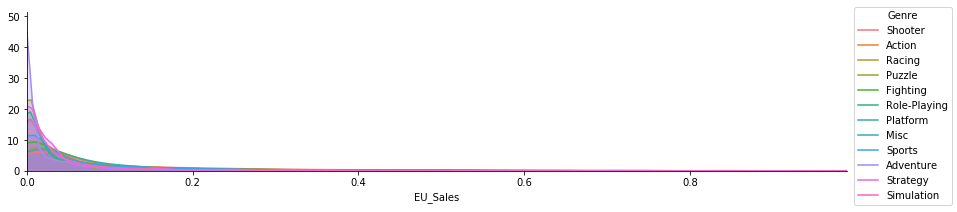

In [41]:
plot_kde_distribution(dat.loc[dat['EU_Sales'] < 1], var='EU_Sales', target='Genre')

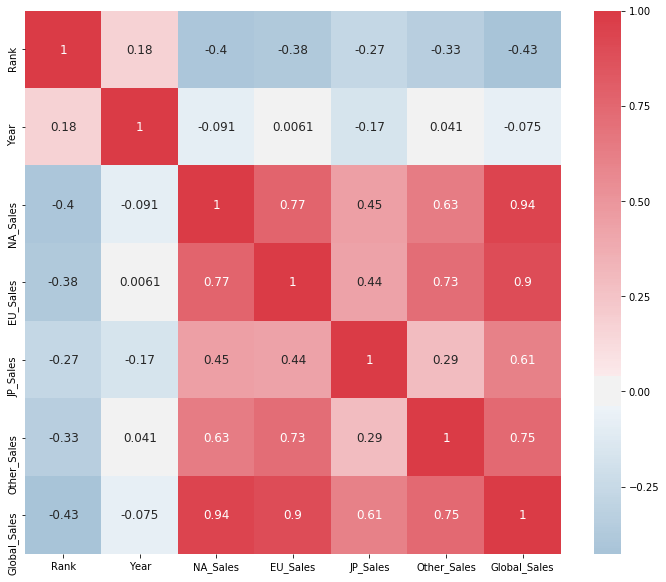

In [49]:
ax = plt.subplots( figsize =(12, 10) ) # change plot size
sns.heatmap(dat.corr(), # correlation matrix of all vars in df_train
           annot=True, # add labels to matrix
            center=0, # sets center of heatmap to 0
           cmap = sns.diverging_palette(240, # change colors to blue and red
                                        10, 
                                        as_cmap=True),
            annot_kws = { 'fontsize' : 12 } # font size
           )

## Test-Train Split
Split the data into test and training (80-20% split).

In [52]:
from sklearn.cross_validation import train_test_split

In [54]:
# Create training and testing datasets
# (Note: can feed it multiple datasets at once as long as they all have same number of rows)
# (specifying random_state ensures that you'll be able to recreate the same test set each time you rerun code)
df_train, df_test = train_test_split(dat, 
                                     test_size = 0.2,
                                     random_state=156)

### Make combined dataset to facilitate applying variable changes to both datasets
df_full = df_train.append(df_test, ignore_index = True) 
#df_train = df_full[:(len(data_split_train))] # Training data set

print(df_train.shape, df_test.shape, df_full.shape)

(13032, 11) (3259, 11) (16291, 11)
